<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

В современных сверточных сетях намного больше слоев, чем у более старых нейросетей (например, у ResNet их 152). Также используются новые методы оптимизации (например, adam) и новые техники подсчета градиента (например, shortcuts). Таким образом, современный сверточные нейронные сети имеют более сложную архитектуру, и, как следствие, более точно предсказывают.


**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

Так как в современных сетях много слоев, то во-первых, обучение происходит долго, во-вторых, для обучения иногда требуются большие объемы памяти, в третьих, большое число слоев может вызывать затухание градиента в backprob при подсчете градиента и вообще градиент в таких случаях считается долго. Кроме того, из-за большого числа слоев появляется много гиперпараметров, которые нужно подбирать.

**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

Здесь есть 2 проблемы - переобучение и то, что из-за малого кол-ва данных мы не сможим нормально обучиться.

Первая проблема решается использованием дропаута, нормализации батчей или регуляризации весов.

Вторую проблему можно решить сделав бутсреп исходной выборки или получить новые картинки при помощи отражения относительно какой-то оси, вращения, масштабирования исходных картинок. Также к исходным картинкам можно добавить шум. Таким образом сможем пополнить нашу выборку новыми данными.

Также можно делать разные 
Очевидная возможность переобучения на данном сете. Можно применять стандартные методики борьбы с переобучением, регуляризации: дропаут, нормализацию батчей, регуляризацию весов. Можно сделать бутстреп из исходного сета, получать новые картинки из имеющихся путём вращения (rotation), масштабирования, добавления шума. Вероятно, имеет смысл сделать больше свёрток, чтобы выжать из изображений максимум информации об их деталях.

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

Стратегия, видимо, такая же, как для изображений: штрафовать за разницу между значениями в разных точках, чтобы получить не зависящие от положения признаки, которые и будут характеризовать стиль. Также штрафовать за разницу полученного и исходного объектов, чтобы сохранить "очертания". Таким образом, минимизируем сумму двух функций потерь. Представлять музыку в виде спектрограмм (short time Fourier transform): двумерный массив, где по вертикали частоты, по горизонтали время. Это позволяет работать с аудиозаписями в точности как с изображениями: спектрограмма сама по себе уже является изображением с одним каналом. Однако, спектр (вертикальная ось) следует сохранить в нетронутом виде (именно он определет звучание в каждый момент времени, то есть целиком отвечает за "стиль"), то есть свёртки будут одномерными, только по времени. Стиль, соответственно, понимается как некоторая не зависящая от времени спектральная характеристика музыки.

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

mkdir: cifar10: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0   561k      0  0:04:56  0:04:56 --:--:-- 1127k  0     0   369k      0  0:07:30  0:01:09  0:06:21  415k    0     0   555k      0  0:04:59  0:01:50  0:03:09  318k02:11  0:03:22  190k:02:55  0:02:59  236k
x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [2]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# import seaborn
import scipy
from scipy import misc
%matplotlib inline

In [3]:
tf.__version__

'1.4.0'

In [5]:
tf.test.is_gpu_available()

True

In [7]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

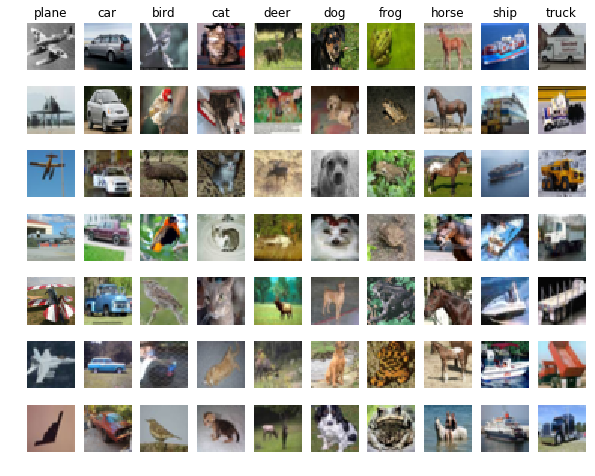

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Закодируем ответы**

In [10]:
enc = OneHotEncoder()
enc.fit(np.hstack((y_train, y_test)).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

## Аугментация

Добавим к обучающей выборке изображения, отраженные по горизонтали

In [11]:
X_train_addition = []
for image in X_train:
    X_train_addition.append(image[:, :, ::-1])
X_train_addition = np.array(X_train_addition)

In [12]:
y_train = np.vstack((y_train, y_train))

Посмотрим, что получилось

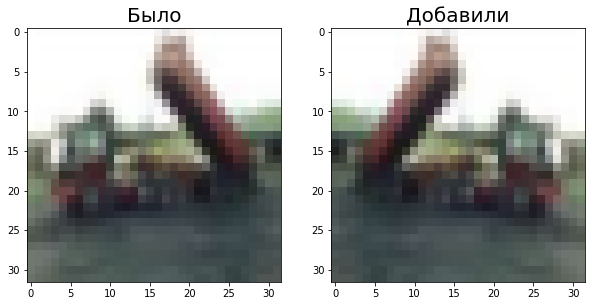

In [13]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[2].astype('uint8').transpose(1, 2, 0))
plt.title('Было', fontsize=20)
plt.subplot(1, 2, 2)
plt.imshow(X_train_addition[2].astype('uint8').transpose(1, 2, 0))
plt.title('Добавили', fontsize=20)
plt.show()

In [14]:
X_train_augment = np.vstack((X_train, X_train_addition))

## Нормализация данных
Хотела применить global contrast normalization с параметрами s и lambda (обычно берут s=1, lambda = 10),  а потом ZCA whitening  <br>
Но первое дало скор хуже, а второе не работало на таких больших данных так как матрица ковариаций, которую нужно посчитать получалась огромного размера и влезала в память. <br>
Поэтому применим обучную нормализацию: просто вычтем среднее и поделим на дисперсию.

In [15]:
X_test -= np.mean(X_train_augment, axis=0)
X_train = X_train_augment - np.mean(X_train_augment, axis=0)

Однако посмотрим, что могло бы получиться.

global_contrast_normalization

In [19]:
def global_contrast_normalization(X, s, lambd):
    epsilon = 1e-9
    X = X - np.mean(X)
    contrast = np.sqrt(lambd + np.mean(X**2))
    X = s * X / max(epsilon, contrast)
    return X

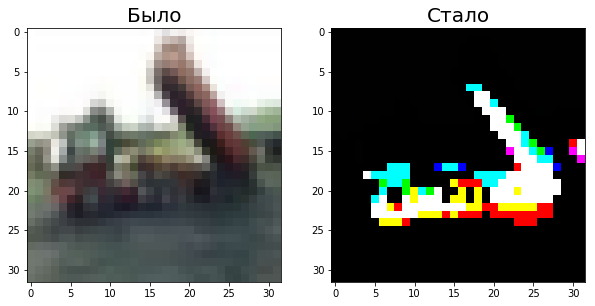

In [20]:
one_image = global_contrast_normalization(X_train_augment[2], s=1, lambd=10)
plt.subplot(1, 2, 1)
plt.imshow(X_train_augment[2].astype('uint8').transpose(1, 2, 0))
plt.title('Было', fontsize=20)
plt.subplot(1, 2, 2)
plt.imshow(one_image.astype('uint8').transpose(1, 2, 0))
plt.title('Стало', fontsize=20)
plt.show()

ZCA whitening

In [21]:
def zca_whitening(X):
    cov = np.cov(X, rowvar=True)
    U, S, V = np.linalg.svd(cov)
    epsilon = 1e-5
    
    ZCA_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
    ZCA = np.dot(ZCA_matrix, X)
    return ZCA

In [22]:
X_100_whitened = zca_whitening(X_train_augment[:100].reshape((-1, 32*32*3))).reshape((-1, 3, 32, 32))

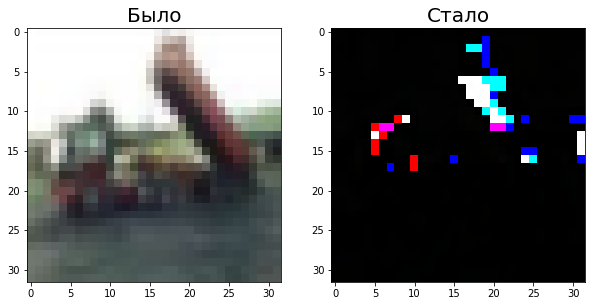

In [23]:
plt.subplot(1, 2, 1)
plt.imshow(X_train_augment[2].astype('uint8').transpose(1, 2, 0))
plt.title('Было', fontsize=20)
plt.subplot(1, 2, 2)
plt.imshow(X_100_whitened[2].astype('uint8').transpose(1, 2, 0))
plt.title('Стало', fontsize=20)
plt.show()

Теперь начнем обучаться

In [24]:
# Write your convolutional NN with Tensorflow (example in seminar).
# For example 3 convolutions and poolings and dense layer after that.

def train_fn(X, y, lr, sess):
    '''
    returns tuple (loss, accuracy) for model train phase
    '''
    
    feed_dict = {X_batch:X, y_batch:y, learning_rate:lr, training:True}
    
    _, loss_train= sess.run([optimizer, loss], feed_dict)
    
    pred = sess.run(predictions, feed_dict)
    accuracy_train = accuracy_score(np.argmax(y, axis=1), np.argmax(pred, axis=1))
    return loss_train, accuracy_train
    
    
def eval_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model evaluation phase
    '''
    feed_dict = {X_batch:X, y_batch:y, training:False}
    loss_val = sess.run(loss, feed_dict)
    pred = sess.run(predictions, feed_dict)
    accuracy_val = accuracy_score(np.argmax(y, axis=1), np.argmax(pred, axis=1))
    return loss_val, accuracy_val

def predict_fn(X, sess):
    '''
    returns y_pred for model predict phase
    '''
    feed_dict = {X_batch:X, training:False}
    pred = sess.run(predictions, feed_dict)
    return pred


In [25]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=True):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

Функция для отрисовки графиков

In [26]:
def plot_history(num_epochs, train_losses, val_losses, train_acc, val_acc):
    plt.figure(figsize=(17, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, num_epochs+1), train_losses, color='red', label='train')
    plt.plot(np.arange(1, num_epochs+1), val_losses, color='peachpuff', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, num_epochs+1), train_acc, color='red', label='train')
    plt.plot(np.arange(1, num_epochs+1), val_acc, color='peachpuff', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.show()

### ResNet 32

Будем реализовывать ResNet https://arxiv.org/pdf/1512.03385.pdf. В статье написано, что при n=5 (32 layers) он дает 93% accuracy. Единственное отличие от статьи в том, что я взяла изначальный learning rate на 1000 меньше (в статье они берут 0.1), так как иначе лосс улетает в бесконечность и становиться nan-ом.
В статье описано 3 варианта shortcuts:

1) zeropadding при увеличении размерности

2) projection shortcuts при увеличении размерности

3) projection shortcuts при любом переходе

Я выбрала второй вариант, так как он обычно дает скор чуть лучше, чем первый и обучается быстрей, чем в третьем варианте.

In [27]:
def ResNet(n=5):
    X_batch = tf.placeholder(tf.float32, (None, 3, 32, 32))
    y_batch = tf.placeholder(tf.int32, (None, num_classes))
    
    # for regularization
    reg_scale = 0.0001
    regularizer = tf.contrib.layers.l2_regularizer(scale=reg_scale)
    
    input_layer = tf.reshape(X_batch, [-1, 32, 32, 3])
    
    tf.keras.initializers.he_normal(seed=None)
    
    def residual_block(input_x, increase_dim=False):
        input_filters = input_x.shape[-1]
        if increase_dim:
            stride = (2, 2)
            output_filters = input_filters * 2
        else:
            stride = (1, 1)
            output_filters = input_filters
       
        conv_1 = tf.layers.conv2d(inputs=input_x, filters=output_filters, kernel_size=[3, 3], strides=stride, 
                                  padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer, 
                                  kernel_initializer=tf.keras.initializers.he_normal())
        norm_1 = tf.layers.batch_normalization(inputs=conv_1)
        conv_2 = tf.layers.conv2d(inputs=norm_1, filters=output_filters, kernel_size=[3, 3], strides=(1,1),
                         padding="same", activation=None, kernel_regularizer=regularizer,
                                 kernel_initializer=tf.keras.initializers.he_normal())
        norm_2 = tf.layers.batch_normalization(inputs=conv_2)
        
        if increase_dim:
            resize = tf.layers.conv2d(inputs=input_x, filters=output_filters, kernel_size=[1, 1], 
                         strides=(2, 2), padding="same", activation=None, kernel_regularizer=regularizer, use_bias=False)
            norm = tf.layers.batch_normalization(inputs=resize)
            sums = tf.add(norm_2, norm)
            output = tf.nn.relu(sums)
        else:
            sums = tf.add(norm_2, input_x)
            output = tf.nn.relu(sums)
            
        return output
    
    # first layer - conv
    conv_1 = tf.layers.conv2d(inputs=input_layer, filters=16, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer)
    net = tf.layers.batch_normalization(inputs=conv_1)
    
    # first residual block
    for i in range(n):
        net = residual_block(net)
        
    #second residual block
    net = residual_block(net, increase_dim=True)
    for i in range(n-1):
        net = residual_block(net)
        
    #third residual block
    net = residual_block(net, increase_dim=True)
    for i in range(n-1):
        net = residual_block(net)
        
    global_pooling = tf.reduce_mean(net, [1,2])
    
    dense = tf.layers.dense(inputs=global_pooling, units=num_classes, activation=None, kernel_regularizer=regularizer)
    
    predictions = tf.nn.softmax(dense)
    
    # loss with l2 regularization
    loss = tf.losses.softmax_cross_entropy(onehot_labels=y_batch, logits=dense)
    l2_loss = tf.losses.get_regularization_loss()
    loss += l2_loss
    
    return X_batch, y_batch, predictions, loss

Обучаем

In [28]:
num_epochs = 110 
batch_size = 128
num_classes = 10

X_batch, y_batch, predictions, loss = ResNet()

learning_rate = tf.placeholder(tf.float32, shape=[])
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9).minimize(loss)


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


lr = 0.01
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        
        # learning rate decay
        if epoch == 40 or epoch == 60:
            lr *= 0.1
            
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            
            inputs, targets = batch
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, lr, sess)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1

        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_test, y_test, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
    
        # Then we print the results for this epoch:
        
        train_losses.append(train_loss / train_batches)
        val_losses.append(valid_loss / valid_batches)
        train_accuracies.append(train_acc / train_batches * 100)
        val_accuracies.append(valid_acc / valid_batches * 100)
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print('learning rate: ', lr)
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
        
        # save results into file
        np.save('train_losses.npy', train_losses)
        np.save('valid_losses.npy', val_losses)
        np.save('train_accuracies.npy', train_accuracies)
        np.save('valid_accuracies.npy', val_accuracies)
        
    # save predictions
    prediction = predict_fn(X_test, sess)

Epoch 1 of 110 took 299.702s
learning rate:  0.001
  train loss:		1.961390
  train accuracy:		27.37 %
  valid loss:		1.689584
  valid accuracy:		38.26 %
Epoch 2 of 110 took 297.092s
learning rate:  0.001
  train loss:		1.582702
  train accuracy:		43.63 %
  valid loss:		1.459803
  valid accuracy:		46.96 %
Epoch 4 of 110 took 297.057s
learning rate:  0.001
  train loss:		1.323989
  train accuracy:		54.15 %
  valid loss:		1.298025
  valid accuracy:		52.88 %
Epoch 6 of 110 took 297.095s
learning rate:  0.001
  train loss:		1.175492
  train accuracy:		59.81 %
  valid loss:		1.189499
  valid accuracy:		57.47 %
Epoch 7 of 110 took 297.073s
learning rate:  0.001
  train loss:		1.118288
  train accuracy:		62.06 %
  valid loss:		1.172202
  valid accuracy:		58.29 %
Epoch 8 of 110 took 296.997s
learning rate:  0.001
  train loss:		1.067130
  train accuracy:		63.95 %
  valid loss:		1.158688
  valid accuracy:		59.04 %
Epoch 9 of 110 took 296.876s
learning rate:  0.001
  train loss:		1.019361
  train

Epoch 59 of 110 took 297.262s
learning rate:  0.0001
  train loss:		0.007321
  train accuracy:		100.00 %
  valid loss:		3.918391
  valid accuracy:		65.36 %
Epoch 60 of 110 took 297.192s
learning rate:  0.0001
  train loss:		0.006303
  train accuracy:		100.00 %
  valid loss:		4.027472
  valid accuracy:		65.31 %
Epoch 61 of 110 took 297.225s
learning rate:  1e-05
  train loss:		0.013058
  train accuracy:		99.77 %
  valid loss:		3.949242
  valid accuracy:		65.52 %
Epoch 62 of 110 took 297.278s
learning rate:  1e-05
  train loss:		0.009897
  train accuracy:		99.91 %
  valid loss:		3.947524
  valid accuracy:		65.51 %
Epoch 63 of 110 took 297.267s
learning rate:  1e-05
  train loss:		0.008805
  train accuracy:		99.96 %
  valid loss:		3.953773
  valid accuracy:		65.50 %
Epoch 64 of 110 took 297.295s
learning rate:  1e-05
  train loss:		0.008067
  train accuracy:		99.97 %
  valid loss:		3.963751
  valid accuracy:		65.53 %
Epoch 65 of 110 took 297.259s
learning rate:  1e-05
  train loss:		0.007

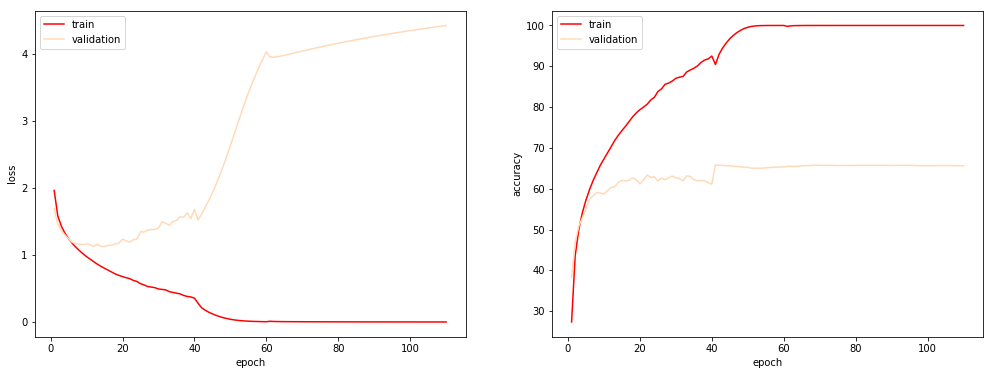

In [29]:
plot_history(num_epochs, train_losses, val_losses, train_accuracies, val_accuracies)

Да уж здесь мы как-то очень сильно переобучились, что странно так как отличие от статьи только в том, что я взяла меньше изначальный learning rate.

### VGG

Попытаемся еще раз. Попробуем реализовать VGG. https://arxiv.org/pdf/1409.1556.pdf.

Я реализовывала VGG c 19 слоями так как она обычно дает скор чуть лучше чем VGG с меньшими слоями. В интернете написано, что на Cifar 10 она дает около 92% accuracy.

Отличия от статьи: <br>
1) Изначальный learning rate пришлось опять взять чуть меньше - в 10 раз (в статье 0.01), так как иначе loss опять становился nan-ом. <br>
2) В статье веса каждого CNN. инизиализировали как нормальное распределение с mean=0 и variance=0.01. Однако при такой инициализации на протяжении первых 10 эпох loss ни на трейне, ни на валидации совсем не изменялся, поэтому пришлось убрать.

In [30]:
def VGG():
    X_batch = tf.placeholder(tf.float32, (None, 3, 32, 32))
    y_batch = tf.placeholder(tf.int32, (None, num_classes))
    training = tf.placeholder(tf.bool, shape=[])
    
    # for regularization
    reg_scale = 0.0005
    regularizer = tf.contrib.layers.l2_regularizer(scale=reg_scale)
    
    input_layer = tf.reshape(X_batch, [-1, 32, 32, 3])
    
    # first block
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=64, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer)
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
    norm1 = tf.layers.batch_normalization(inputs=conv1)
    conv2 = tf.layers.conv2d(inputs=norm1, filters=64, kernel_size=[3, 3], 
                             padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer) 
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
    norm2 = tf.layers.batch_normalization(inputs=conv2)
    net = tf.layers.max_pooling2d(inputs=norm2, pool_size=[2, 2], strides=2)
    
    # second block
    for i in range(2):
        net = tf.layers.conv2d(inputs=net, filters=128, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer)
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
        net = tf.layers.batch_normalization(inputs=net)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=[2, 2], strides=2)
    
    # third block
    for i in range(4):
        net = tf.layers.conv2d(inputs=net, filters=256, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer) 
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
        net = tf.layers.batch_normalization(inputs=net)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=[2, 2], strides=2)
    
    
    # fouth block
    for i in range(4):
        net = tf.layers.conv2d(inputs=net, filters=512, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer)
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
        net = tf.layers.batch_normalization(inputs=net)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=[2, 2], strides=2)
    
    # fifth block
    for i in range(4):
        net = tf.layers.conv2d(inputs=net, filters=512, kernel_size=[3, 3], 
                         padding="same", activation=tf.nn.relu, kernel_regularizer=regularizer) 
#                                   kernel_initializer=tf.initializers.random_normal(mean=0, stddev=0.01))
        net = tf.layers.batch_normalization(inputs=net)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=[2, 2], strides=2)
    
    # dense block
    flatten = tf.contrib.layers.flatten(inputs=net)
    dropout1 = tf.layers.dropout(inputs=flatten, rate=0.5, training=training)
    dense1 = tf.layers.dense(inputs=dropout1, units=4096, activation=tf.nn.relu)
    dropout2 = tf.layers.dropout(inputs=dense1, rate=0.5, training=training)
    dense2 = tf.layers.dense(inputs=dropout2, units=4096, activation=tf.nn.relu)
    dense3 = tf.layers.dense(inputs=dropout2, units=num_classes, activation=None)
    
    predictions = tf.nn.softmax(dense3)

    loss = tf.losses.softmax_cross_entropy(onehot_labels=y_batch, logits=dense3)
    l2_loss = tf.losses.get_regularization_loss()
    loss += l2_loss
    return X_batch, y_batch, predictions, loss, training

In [31]:
num_epochs = 110 
batch_size = 128
num_classes = 10

X_batch, y_batch, predictions, loss, training = VGG()

learning_rate = tf.placeholder(tf.float32, shape=[])
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9).minimize(loss)


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
best_accuracy = 0


lr = 0.001
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        print("Start epoch", epoch + 1)
        
        # learning rate decay
        if epoch == 10 or epoch == 30 or epoch == 80:
            lr *= 0.1
            
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            
            inputs, targets = batch
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, lr, sess)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
            
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_test, y_test, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
    
        # Then we print the results for this epoch:
        
        train_losses.append(train_loss / train_batches)
        val_losses.append(valid_loss / valid_batches)
        train_accuracies.append(train_acc / train_batches * 100)
        val_accuracies.append(valid_acc / valid_batches * 100)
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print('learning rate: ', lr)
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
        
        # save results into file
        np.save('trainLosses.npy', train_losses)
        np.save('validLosses.npy', val_losses)
        np.save('trainAccuracies.npy', train_accuracies)
        np.save('validAccuracies.npy', val_accuracies)
        
        
    # save best prediction
    # predict with batches of size 500
    prediction = []
    prediction = predict_fn(X_test[:500], sess)
    for i in range(1, 20):
        prediction = np.vstack((prediction, predict_fn(X_test[500*i:500*(i+1)], sess)))

Start epoch 1
Epoch 1 of 110 took 440.145s
learning rate:  0.001
  train loss:		6.088794
  train accuracy:		13.10 %
  valid loss:		6.085822
  valid accuracy:		17.15 %
Start epoch 2
Epoch 2 of 110 took 428.023s
learning rate:  0.001
  train loss:		5.446325
  train accuracy:		30.53 %
  valid loss:		5.444372
  valid accuracy:		29.35 %
Start epoch 3
Epoch 3 of 110 took 436.246s
learning rate:  0.001
  train loss:		5.011211
  train accuracy:		40.26 %
  valid loss:		5.024100
  valid accuracy:		38.95 %
Start epoch 4
Epoch 4 of 110 took 436.451s
learning rate:  0.001
  train loss:		4.676728
  train accuracy:		47.04 %
  valid loss:		4.713060
  valid accuracy:		45.90 %
Start epoch 5
Epoch 5 of 110 took 434.410s
learning rate:  0.001
  train loss:		4.383628
  train accuracy:		52.66 %
  valid loss:		4.446181
  valid accuracy:		51.09 %
Start epoch 6
Epoch 6 of 110 took 428.729s
learning rate:  0.001
  train loss:		4.132077
  train accuracy:		57.04 %
  valid loss:		4.192673
  valid accuracy:		55.42 

Видим, что на некоторых эпохах accuracy на в валидации (в данном случае на тесте) больше 90. Посмотрим на итоговый accuracy

In [32]:
print('test accuracy: ', accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction, axis=1)) * 100)

test accuracy:  89.83


Обидно не хватило совсем чуть-чуть. Но переобучать заново слишком долго. Посмотрим на графики лоса и акураси.

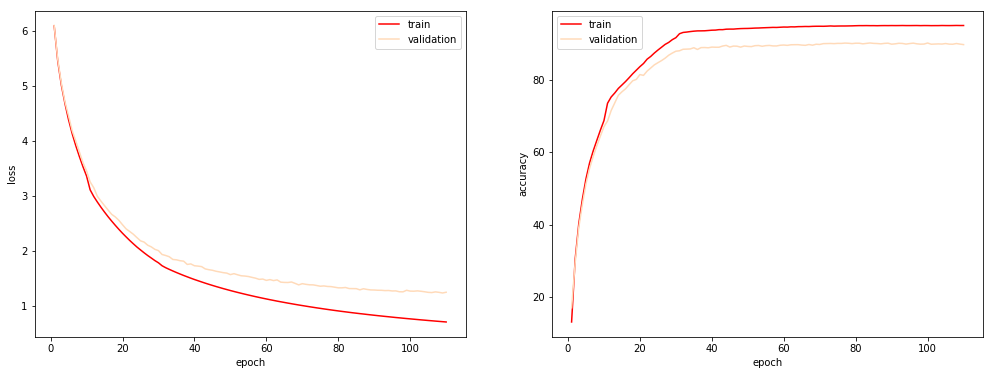

In [33]:
plot_history(num_epochs, train_losses, val_losses, train_accuracies, val_accuracies)

Подробно алгоритмы я не описывала, так как они есть в статьях, а для понимая кода написала несколько комментариев.